# Agriculter Dataset - Classification

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

## About the data

- ID -	UniqueID


- Estimated_Insects_Count - Estimated insects count per square meter	


- Crop_Type	- Category of crop


- Soil_Type - Category of soil


- Pesticide_Use_Category - Types of pesticides used


- Number_Doses_Week - Number of doses per week


- Number_Weeks_Used - Number of weeks used


- Number_Weeks_Quit - Number of weeks quit	


- Season - Season category


- Crop_Damage - Crop damage category

In [1]:
# Importing the data
import pandas as pd 
import numpy as np

train = pd.read_csv(r'C:\Users\User\Desktop\Projects\train_agriculture.csv')
test = pd.read_csv(r'C:\Users\User\Desktop\Projects\test_agriculture.csv')

train.shape, test.shape

((4599, 10), (1199, 9))

In [2]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


The dataset has 4599 examples, 10 feature columns and 1 target column. 8 of the 10 features are 64 bit integers, 1 is 64 bit floats and the ID column is of the type object.

In [5]:
# Deleting duplicate rows
train[train.duplicated(keep='first')].shape, test[test.duplicated(keep='first')].shape

((0, 10), (0, 9))

There are no duplicate rows

In [6]:
# Dropping the columns that have just one data level

temp = []
for col in train.columns:
    if len(train[col].unique()) == 1:
        temp.append(col)
        train.drop(col,inplace=True,axis=1)

train.shape

(4599, 10)

There are no variables with just one data level

In [7]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


- We also notice that most of the features stay within a reasonable scale when comparing values within only one column. 


- The column Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used and Number_Weeks_Quit entail outliers

In [8]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


- We also notice that most of the features stay within a reasonable scale when comparing values within only one column. 


- The column Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used and Number_Weeks_Quit entail outliers

# EDA

In [9]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

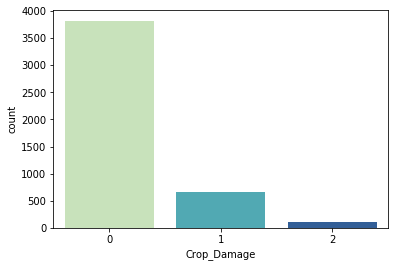

In [10]:
sns.countplot(train['Crop_Damage'], palette='YlGnBu')

- Most of the crops are alive and healthy

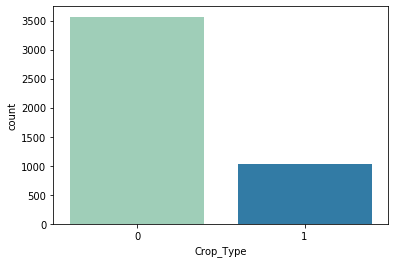

In [11]:
sns.countplot(train['Crop_Type'], palette='YlGnBu')

- Most of the crops are of category 0

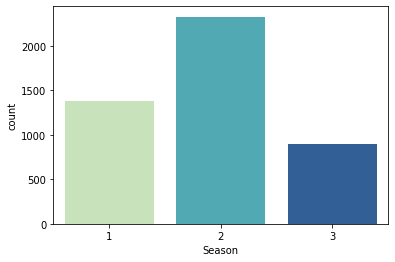

In [12]:
sns.countplot(train['Season'], palette='YlGnBu')

- Most of the entries are from the 2nd season 

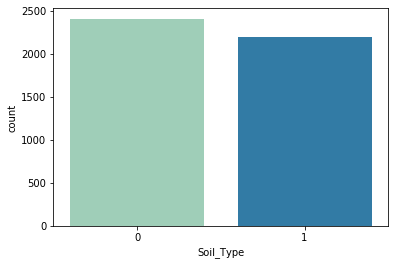

In [13]:
sns.countplot(train['Soil_Type'], palette='YlGnBu')

- Most of the crops are grown in category 0

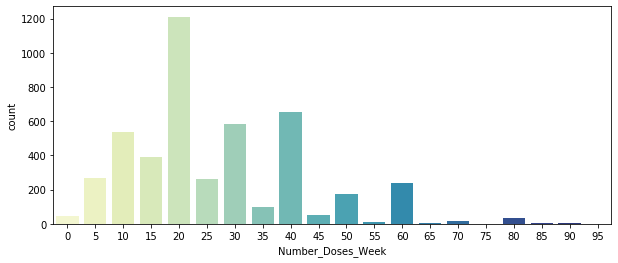

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(train['Number_Doses_Week'], palette='YlGnBu')

The maximum number of doeses given was 20

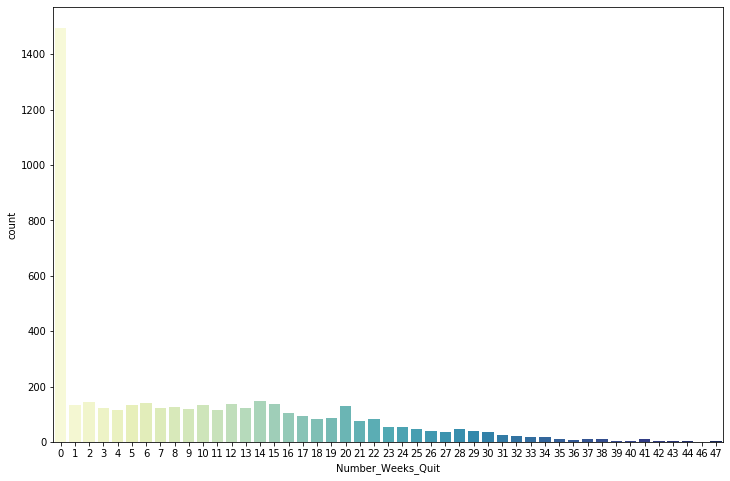

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(train['Number_Weeks_Quit'], palette='YlGnBu')

Most of the times, a week wasn't quit

Text(0.5, 1.0, 'Number Weeks Quit')

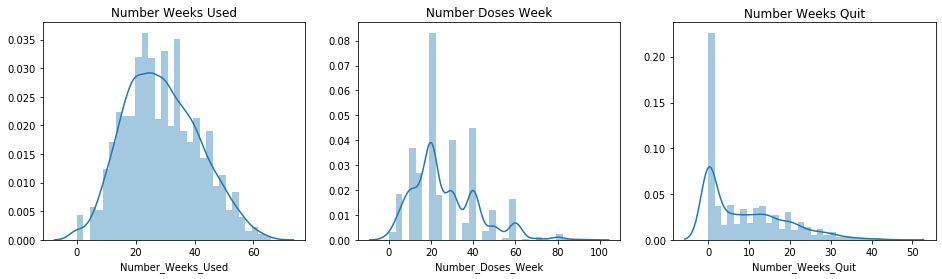

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(train['Number_Weeks_Used'], bins = 30, ax = axes[0], kde = True)
ax.set_title('Number Weeks Used')
ax = sns.distplot(train['Number_Doses_Week'], bins = 30, ax = axes[1], kde = True)
ax.set_title('Number Doses Week')
ax = sns.distplot(train['Number_Weeks_Quit'], bins = 30, ax = axes[2], kde = True)
ax.set_title('Number Weeks Quit')

- The Number Weeks Used has a normal distribution


- The Number Doses Week is also an almost normal distribution


- The variable Number Weeks Quit is seemingly right skeweed

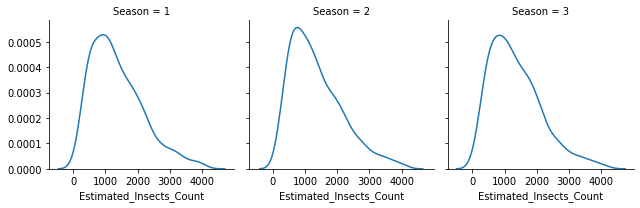

In [17]:
g = sns.FacetGrid(train,col='Season')
g = g.map(sns.kdeplot, 'Estimated_Insects_Count')

- The season does not have a seeming effect on the estimated insect count.


- The insect count remains constant across all seasons, however the data is right skeweed

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

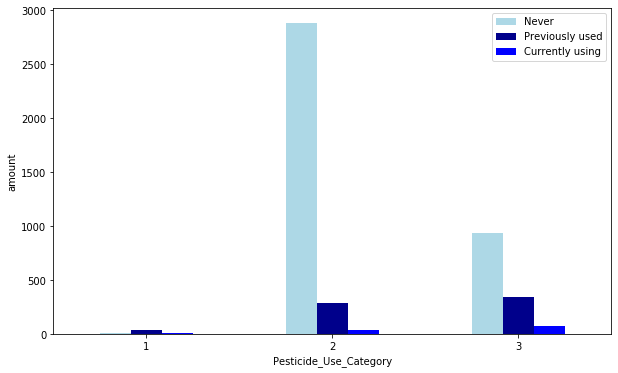

In [18]:
# Creating a plot of crosstab 
pd.crosstab(train.Pesticide_Use_Category ,train.Crop_Damage).plot(kind='bar',figsize=(10,6),color=['lightblue','darkblue','blue'])
#plt.xlabel('0 =  , 1 = Heart disease')
plt.ylabel('amount')
plt.legend(['Never','Previously used','Currently using'])
plt.xticks(rotation=0)

#### Checking for Outliers

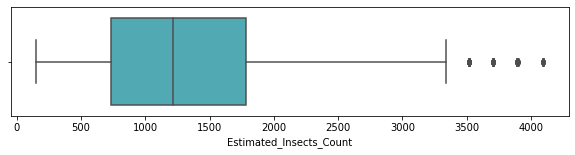

In [19]:
plt.figure(figsize=(10,2))
sns.boxplot('Estimated_Insects_Count', data=train, palette='YlGnBu')

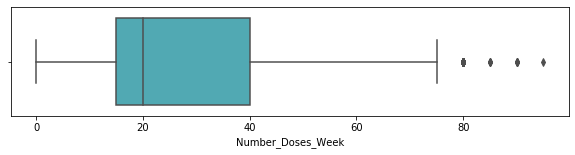

In [20]:
plt.figure(figsize=(10,2))
sns.boxplot('Number_Doses_Week', data=train, palette='YlGnBu')

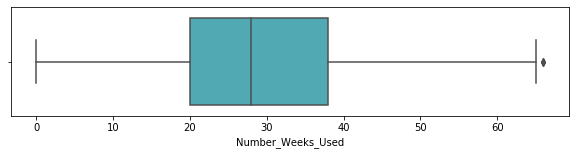

In [21]:
plt.figure(figsize=(10,2))
sns.boxplot('Number_Weeks_Used', data=train, palette='YlGnBu')

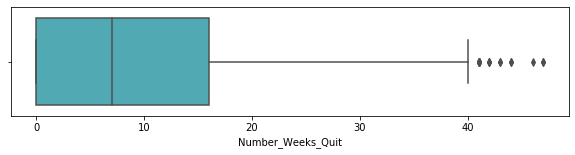

In [22]:
plt.figure(figsize=(10,2))
sns.boxplot('Number_Weeks_Quit', data=train, palette='YlGnBu')

All the above columns have outliers

#### Checking for correlation

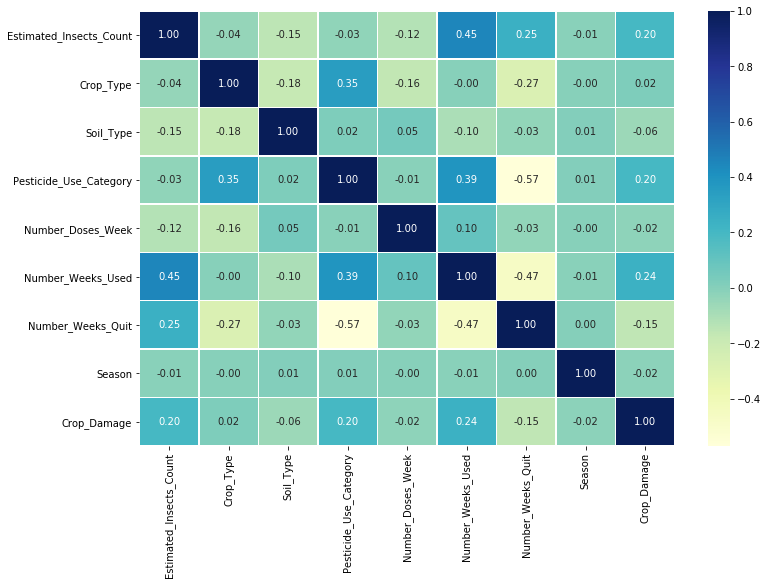

In [23]:
fig , ax = plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5)

- None of the columns behave extremly negativily or possitivly with the target variable or among each other.


- Hence none of these need to be deleted.

# Feature Engineering

In [24]:
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [25]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

Both the train and test dataframe have null values in the variable Number_Weeks_Used, which need to be imputed

In [26]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
train['Number_Weeks_Used']=imp.fit_transform(train['Number_Weeks_Used'].values.reshape(-1,1))
test['Number_Weeks_Used']=imp.fit_transform(test['Number_Weeks_Used'].values.reshape(-1,1))

In [27]:
train.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            64
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

The variable ID has unique value for every entry, hence it should be dropped.

In [28]:
train.drop(['ID'], axis=1, inplace=True)

In [29]:
test.drop(['ID'], axis=1, inplace=True)

#### Treating the Outliers

As mentioned above the, the outliers need to be treated 

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(train))
threshold = 3
train1 = train[(z<3).all(axis=1)]
train1.shape, train.shape

((4370, 9), (4599, 9))

around 200 rows have been deleted inorder to treat outliers

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(test))
threshold = 3
test1 = test[(z<3).all(axis=1)]
test1.shape, test.shape

((1160, 8), (1199, 8))

# Training Phase

#### Splitting the target variable from the train dataframe

In [32]:
targets = train1['Crop_Damage']
train1.drop('Crop_Damage',axis=1,inplace=True)
train1.shape, targets.shape, test.shape

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((4370, 8), (4370,), (1199, 8))

#### Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train1 = sc.fit_transform(train1)

#### Splitting the data

In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train1,targets,test_size=.20,random_state=55)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
import warnings
warnings.filterwarnings('ignore')

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)
log = accuracy_score(test_y,pred)*100

print('accuracy score:', log)
print('\n')
print(confusion_matrix(test_y, pred))
print('\n')
print (classification_report(test_y,pred))

accuracy score: 86.8421052631579


[[756   6]
 [109   3]]


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       762
           1       0.33      0.03      0.05       112

    accuracy                           0.87       874
   macro avg       0.60      0.51      0.49       874
weighted avg       0.80      0.87      0.82       874



### Gaussian Classification

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
predgnb= gnb.predict(test_x)
gaussian = accuracy_score(test_y,predgnb)*100

print('accuracy score:',gaussian)
print('\n')
print(confusion_matrix(test_y, predgnb))
print('\n')
print(classification_report(test_y, predgnb))

accuracy score: 84.89702517162472


[[718  44]
 [ 88  24]]


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       762
           1       0.35      0.21      0.27       112

    accuracy                           0.85       874
   macro avg       0.62      0.58      0.59       874
weighted avg       0.82      0.85      0.83       874



### SVM Classification

In [40]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',probability=True)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
svcs = accuracy_score(test_y, predsvc)*100

print('accuracy score:',svcs)
print('\n')
print(confusion_matrix(test_y, predsvc))
print('\n')
print(classification_report(test_y, predsvc))

accuracy score: 87.18535469107552


[[762   0]
 [112   0]]


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       762
           1       0.00      0.00      0.00       112

    accuracy                           0.87       874
   macro avg       0.44      0.50      0.47       874
weighted avg       0.76      0.87      0.81       874



### DecisionTree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
decision_e = accuracy_score(test_y, preddtc)*100

print('accuracy score:',decision_e )
print('\n')
print(confusion_matrix(test_y, preddtc))
print('\n')
print(classification_report(test_y, preddtc))

accuracy score: 78.83295194508008


[[657 105]
 [ 80  32]]


              precision    recall  f1-score   support

           0       0.89      0.86      0.88       762
           1       0.23      0.29      0.26       112

    accuracy                           0.79       874
   macro avg       0.56      0.57      0.57       874
weighted avg       0.81      0.79      0.80       874



### RandomForest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=75) 
rf.fit(train_x,train_y)
predrf = rf.predict(test_x)
random = accuracy_score(test_y,predrf)*100

print('accuracy score:',random)
print('\n')
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

accuracy score: 85.69794050343249


[[733  29]
 [ 96  16]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       762
           1       0.36      0.14      0.20       112

    accuracy                           0.86       874
   macro avg       0.62      0.55      0.56       874
weighted avg       0.82      0.86      0.83       874



### KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn = knn.predict(test_x)
knn_a = accuracy_score(test_y, predknn)*100

print('accuracy score:',knn_a)
print('\n')
print(confusion_matrix(test_y, predknn))
print('\n')
print(classification_report(test_y, predknn))

accuracy score: 84.78260869565217


[[718  44]
 [ 89  23]]


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       762
           1       0.34      0.21      0.26       112

    accuracy                           0.85       874
   macro avg       0.62      0.57      0.59       874
weighted avg       0.82      0.85      0.83       874



### GradientBoost Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(random_state=0)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)
predgbr = gbr.predict(test_x)
gbr_a = accuracy_score(test_y, predgbr)*100

print('accuracy score:',gbr_a)
print('\n')
print(confusion_matrix(test_y, predgbr))
print('\n')
print(classification_report(test_y, predgbr))

accuracy score: 87.4141876430206


[[750  12]
 [ 98  14]]


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       762
           1       0.54      0.12      0.20       112

    accuracy                           0.87       874
   macro avg       0.71      0.55      0.57       874
weighted avg       0.84      0.87      0.84       874



### ExtraaClass Classifier

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
reg = ExtraTreesClassifier()
reg.fit(train_x, train_y)
reg.score(train_x,train_y)
predreg = reg.predict(test_x)
reg_a = accuracy_score(test_y, predreg)*100

print('accuracy score:',reg_a)
print('\n')
print(confusion_matrix(test_y, predreg))
print('\n')
print(classification_report(test_y, predreg))

accuracy score: 85.1258581235698


[[724  38]
 [ 92  20]]


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       762
           1       0.34      0.18      0.24       112

    accuracy                           0.85       874
   macro avg       0.62      0.56      0.58       874
weighted avg       0.82      0.85      0.83       874



### XGBClassifier

In [46]:
from xgboost import XGBClassifier

xbg = XGBClassifier()
xbg.fit(train_x, train_y)
xbg.score(train_x,train_y)
predxbg = xbg.predict(test_x)
xbg_a = accuracy_score(test_y, predxbg)*100

print('accuracy score:',xbg_a)
print('\n')
print(confusion_matrix(test_y, predxbg))
print('\n')
print(classification_report(test_y, predxbg))

[22:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score: 85.81235697940504


[[726  36]
 [ 88  24]]


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       762
           1       0.40      0.21      0.28       112

    accuracy                           0.86       874
   macro avg       0.65      0.58      0.60       874
weighted avg       0.83      0.86      0.84       874



#### Picking the best model

In [47]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree',
              'Random Forest','Support Vector Machines', 'KNN', 'GradientBoost', 'ExtraaTree', 'XGBoost' ],
    'Score': [log,gaussian,svcs,decision_e,random,knn_a,gbr_a,reg_a,xbg_a]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,GradientBoost,87.414188
2,Decision Tree,87.185355
0,Logistic Regression,86.842105
8,XGBoost,85.812357
4,Support Vector Machines,85.697941
7,ExtraaTree,85.125858
1,Gaussian Naive Bayes,84.897025
5,KNN,84.782609
3,Random Forest,78.832952


The best 3 models are:

1. GradientBoost
2. DecisionTree
3. Logistic Regression

#### CrossValidation Score 

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
print('Cross Val Score for GradientBoost', cross_val_score(gbr,train1,targets).mean())

Cross Val Score for GradientBoost 0.8501144164759726


In [50]:
print('Cross Val Score for DecisionTree', cross_val_score(dtc,train1,targets).mean())

Cross Val Score for DecisionTree 0.7389016018306636


In [51]:
print('Cross Val Score for LogisticRegression', cross_val_score(lg,train1,targets).mean())

Cross Val Score for LogisticRegression 0.8446224256292906


__Thus the Gradient Boost Classifier Model is the best Model for our data, hence it should be used to make predictions__

#### Testing the best model

In [52]:
gbr = GradientBoostingClassifier(random_state=0)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)
predgbr = gbr.predict(test_x)
gbr_a = accuracy_score(test_y, predgbr)*100
print('accuracy score:',gbr_a)

accuracy score: 87.4141876430206


#### Saving the results

In [53]:
pred_gb = gbr.predict(test)
df = pd.DataFrame(pred_gb)
df.to_csv('GradientBoost_preddictions.csv')

#### Saving the best model

In [54]:
import pickle

filename = 'agriculture.pkl'
pickle.dump(gbr, open(filename, 'wb'))